In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
# dataset 
house = pd.read_csv('Housing (1).csv')

In [67]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [68]:
house.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [69]:
house.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [70]:
house.shape

(545, 13)

In [71]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [72]:
house.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [73]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


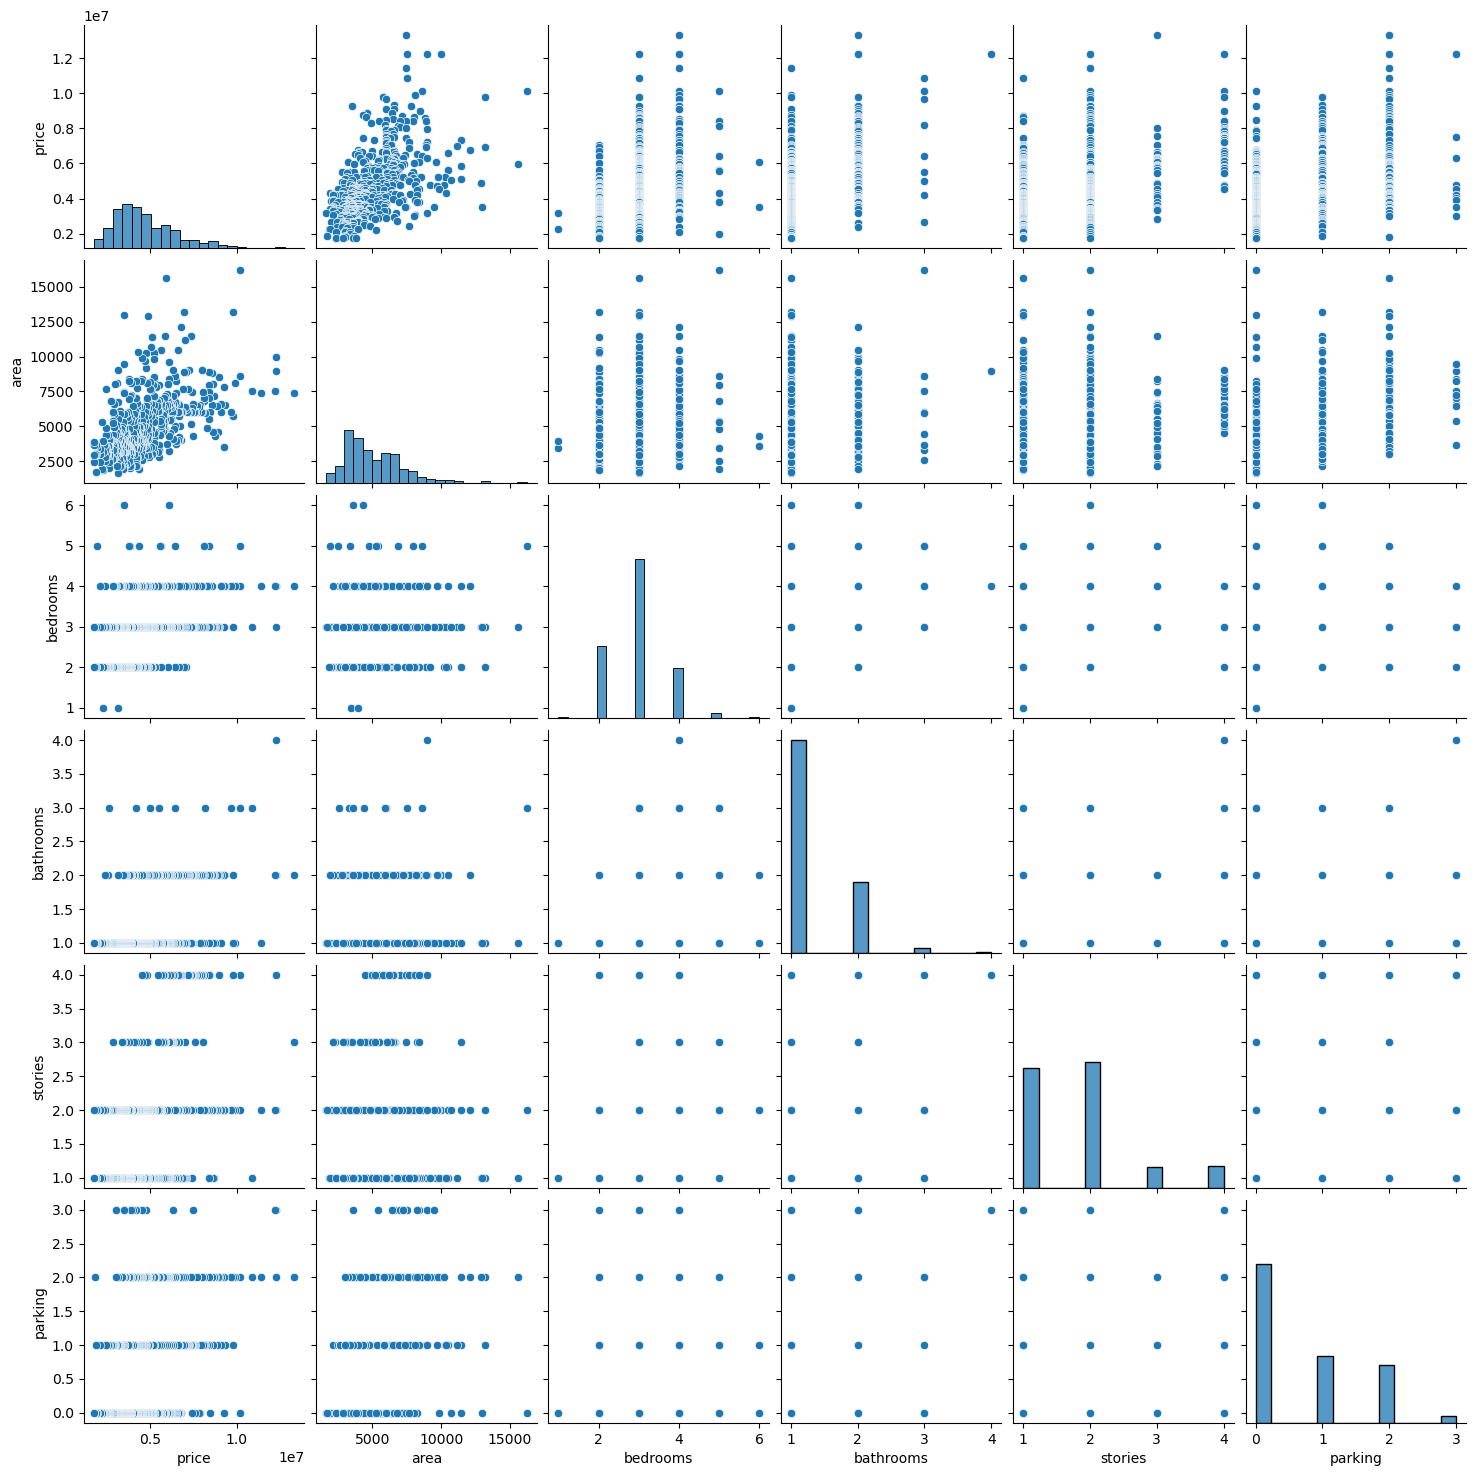

In [74]:
sns.pairplot(house)
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler

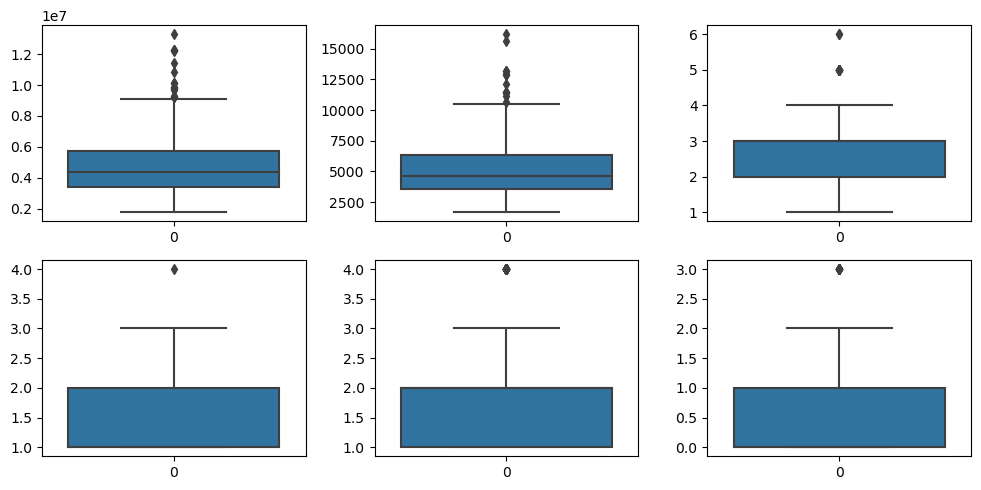

In [76]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['price'], ax = axs[0,0])
plt2 = sns.boxplot(house['area'], ax = axs[0,1])
plt3 = sns.boxplot(house['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house['parking'], ax = axs[1,2])

plt.tight_layout()


In [77]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [78]:
z_scr = zscore(house[['price', 'area']])
threshold = 3
outlier_mask = (abs(z_scr) > threshold).any(axis=1)
newdf = house[~outlier_mask]
newdf
print("Total outlier mask:",outlier_mask.sum())

Total outlier mask: 13


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

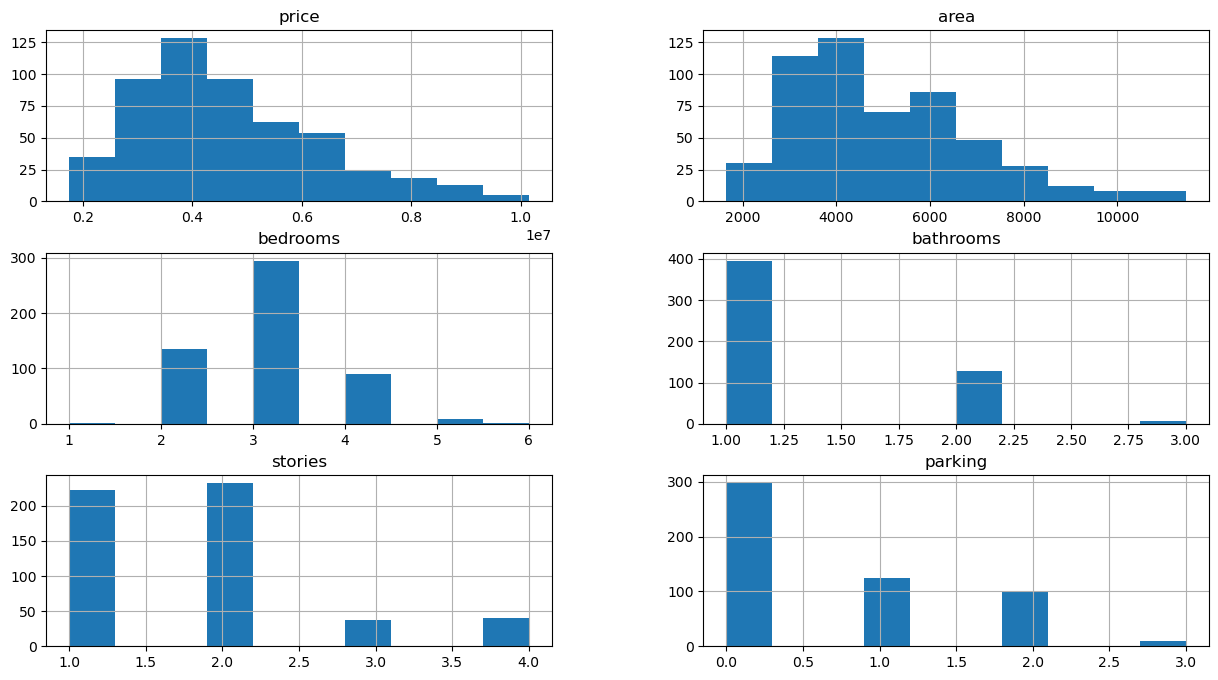

In [79]:
newdf.hist(figsize=(15,8))

Text(0.5, 1.0, 'Furnishing')

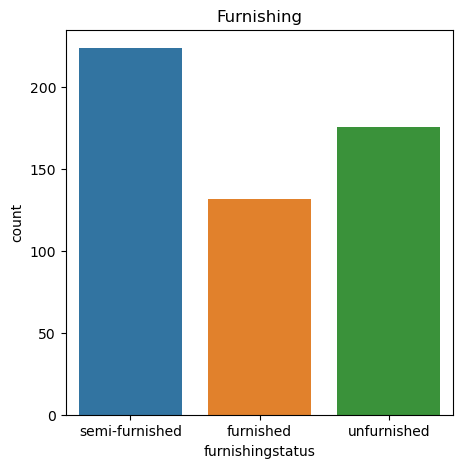

In [96]:
plt.figure(figsize=(5,5))
sns.countplot(x='furnishingstatus',data=newdf).set_title('Furnishing')

Text(0.5, 1.0, 'Linked to Main road')

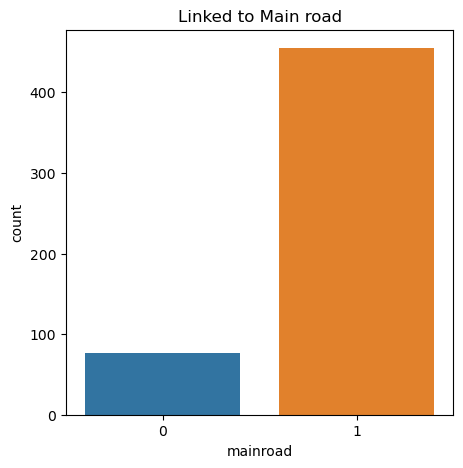

In [95]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'mainroad', data = newdf).set_title('Linked to Main road')

Text(0.5, 1.0, 'Area VS Price')

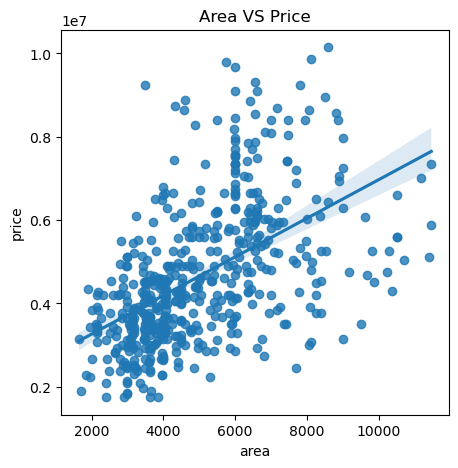

In [94]:
plt.figure(figsize=(5,5))
sns.regplot(x = 'area', y = 'price', data = newdf).set_title('Area VS Price')

In [83]:
encode_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
newdf[encode_columns] = newdf[encode_columns].replace({'yes': 1, 'no': 0})
newdf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,semi-furnished
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [84]:
newdf.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    224
unfurnished       176
furnished         132
Name: count, dtype: int64

In [85]:
house_d = newdf.join(pd.get_dummies(newdf['furnishingstatus']).astype(int)).drop(['furnishingstatus'],axis=1)
house_d

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,0,1,0
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [86]:
scaler = MinMaxScaler()
features_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
house_d[features_to_scale] = scaler.fit_transform(house_d[features_to_scale])
house_d.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,1.000000,0.706422,0.6,1.0,1.000000,1,0,0,0,1,0.666667,1,0,1,0
8,0.966667,0.657492,0.6,0.0,0.333333,1,1,1,0,1,0.666667,1,1,0,0
9,0.958333,0.417941,0.4,0.5,1.000000,1,1,0,0,1,0.333333,1,0,0,1
11,0.944167,0.443425,0.6,1.0,0.333333,1,1,1,1,0,0.666667,0,0,1,0
12,0.900000,0.499490,0.6,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1,0


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X= np.array(house_d.drop('price', axis=1))
y= np.array(house_d['price']).reshape(-1, 1)
print(X.shape)
print(y.shape)

(532, 14)
(532, 1)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [90]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 0.013127329876331539
R2 Score: 0.752794832180631


In [92]:
df = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten()})
df.head()

,actual,predicted
0,0.891667,0.514117
1,0.108333,0.053686
2,0.508333,0.373867
3,0.108333,0.387893
4,0.158333,0.294714


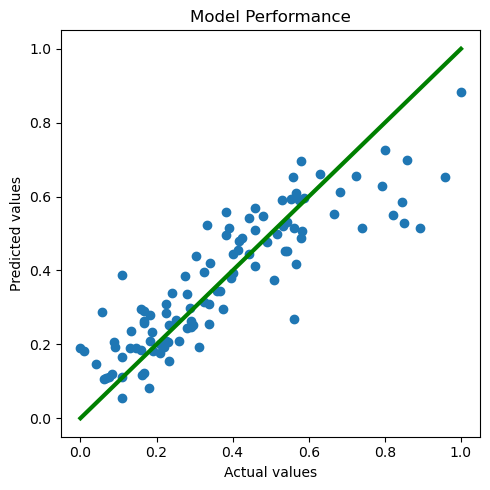

In [93]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linewidth = 3,color='green')
plt.title('Model Performance')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()
plt.show()